# Masking with `GoFish`

This notebook will discuss the various ways a user can build a mask in `GoFish` and use it for the various pixel stacking functions.

In [1]:
import matplotlib.pyplot as plt
from gofish import imagecube
import numpy as np

In [2]:
cube = imagecube('TWHya_CS_32_M0.fits', FOV=10.0)

## Defining a Mask

Most of the functions in `GoFish` allow the user to define a mask with the `get_mask` function. In general, you can check what the mask looks like using the `plot_mask` function to check it is doing what you want it to do.

Below we'll discuss some of the various masks one can use.

### Simple Mask

The most simple mask is just bounded in both radius and azimuth. This has the following variables:

* `r_min` - The inner radius of the mask in arcseconds.
* `r_max` - The outer radius of the mask in arcseconds.
* `PA_min` - The minimum position / polar angle in degrees.
* `PA_max` - The maximum position / polar angle in degrees.
* `mask_frame` - Whether the radial and azimuthal coordinates represent the disk-frame, `mask_frame='disk'`, the default value, or the sky-frame, `mask_frame='sky'`.

When using `mask_frame='disk'`, you must also specify the geometrical properties of the disk, i.e. at least the inclination and position angle of the disk. In this coordinate system, all polar angles are measured from the red-shifted major axis of the disk, while for `mask_frame='sky'`, all position angles are measured from North.

Text(0, 0.5, 'Offset (arcsec)')

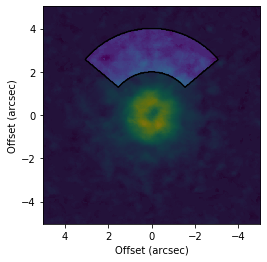

In [3]:
# Make a mask specified in the sky-plane.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)
cube.plot_mask(ax=ax, r_min=2.0, r_max=4.0, PA_min=-50.0, PA_max=50.0, mask_frame='sky')
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

Text(0, 0.5, 'Offset (arcsec)')

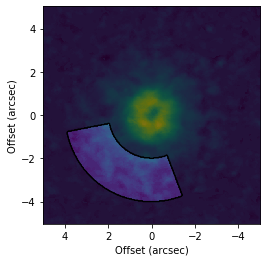

In [4]:
# Make a mask specified in the disk-plane.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)
cube.plot_mask(ax=ax, r_min=2.0, r_max=4.0, PA_min=-50.0, PA_max=50.0, inc=6.5, PA=151.0, mask_frame='disk')
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

It is also important to note that with highly inclined disks, the perspective means that masks specified in the disk-plane wil not have the same projected azimuthal extent. Consider the above mask, but now for a highly inclined disk.

Text(0, 0.5, 'Offset (arcsec)')

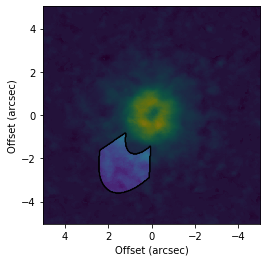

In [5]:
# Make a mask specified in the disk-plane.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)
cube.plot_mask(ax=ax, r_min=2.0, r_max=4.0, PA_min=-50.0, PA_max=50.0, inc=65.0, PA=151.0, mask_frame='disk')
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

This gives a very different mask than the one above.

## Symmetric Masks

You may want to define a mask which is symmetric, for example encompasses a small range about the major or minor axes. This can be achieved with the following variables:

* `exclude_r` - Whether to exclude the radial range given, default is `False`.
* `exclude_PA` - Whether to exclude the azimuthal range given, default is `False`.
* `abs_PA` - Calculate the mask taking the absolute values of the polar / position angles.

For example, to create a mask that is +/- 30 degrees about the major or minor axis:

Text(0, 0.5, 'Offset (arcsec)')

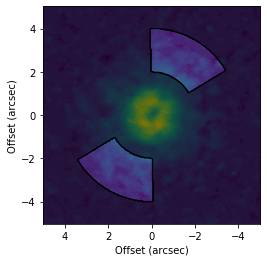

In [6]:
# Make a mask symmetric about the major axis.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)
cube.plot_mask(ax=ax, r_min=2.0, r_max=4.0, PA_min=30.0, PA_max=150.0, abs_PA=True, exclude_PA=True,
               inc=6.5, PA=151.0, mask_frame='disk')
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

Text(0, 0.5, 'Offset (arcsec)')

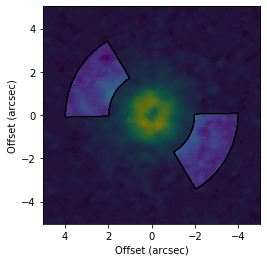

In [7]:
# Make a mask symmetric about the minor axis.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)
cube.plot_mask(ax=ax, r_min=2.0, r_max=4.0, PA_min=60.0, PA_max=120.0, abs_PA=True, exclude_PA=False,
               inc=6.5, PA=151.0, mask_frame='disk')
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

## User-Defined Masks

If you want something more complex, you can input the mask yourself. For example if you want to generate a mask based on the emission morphology or some more complex function. Most functions will take directly a `mask` value which should have the same shape as the data, either a channel for an imagecube or the moment map size.

Text(0, 0.5, 'Offset (arcsec)')

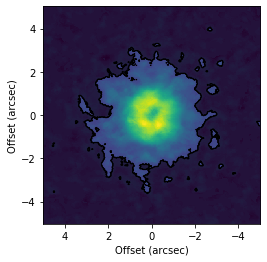

In [8]:
# Make a mask based on the emission morphology.
fig, ax = plt.subplots()
ax.imshow(cube.data, origin='lower', extent=cube.extent)

# Make a mask based on the maximum value of the imagecube.
mask = cube.data > 0.1 * np.max(cube.data)

cube.plot_mask(ax=ax, mask=mask)
ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

## Usage with Other Functions

Once we have a mask you're happy with, you can use it with most `GoFish` functions. Below we demonstrate how this affects the radial profile function.

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


Text(0, 0.5, 'Integrated Flux (Jy/beam km/s)')

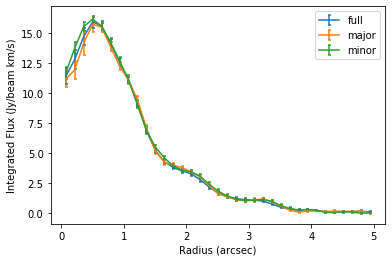

In [9]:
fig, ax = plt.subplots()

# radial profile from the full azimuth.
x, y, dy = cube.radial_profile(inc=6.5, PA=151.0)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='full')

# radial profile from the major axis.
x, y, dy = cube.radial_profile(inc=6.5, PA=151.0, PA_min=20.0, 
                               PA_max=160.0, abs_PA=True, exclude_PA=True)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='major')

# radial profile from the minor axis.
x, y, dy = cube.radial_profile(inc=6.5, PA=151.0, PA_min=70.0, 
                               PA_max=110.0, abs_PA=True, exclude_PA=False)
ax.errorbar(x, y, dy, capsize=1.5, capthick=1.5, label='minor')

ax.legend()
ax.set_xlabel('Radius (arcsec)')
ax.set_ylabel('Integrated Flux (Jy/beam km/s)')

**Note:** If there is a function which does not accept these mask parameters and you think it should, please [raise an issue on GitHub](https://github.com/richteague/gofish/issues).